In [1]:
import pandas as pd

In [2]:
# 불용어 로드
url = 'https://raw.githubusercontent.com/chaerui7967/stock_predict_news_and_youtube/master/Sentiment_Analysis/data/stopwords_ver1.txt'
stopwords = list(pd.read_csv(url, header=None)[0])

In [42]:
cel_2018 = pd.read_csv('2018_celltrion.csv')
cel_2019 = pd.read_csv('2019_celltrion.csv')
cel_2020 = pd.read_csv('2020_celltrion.csv')

train_data = pd.concat([cel_2018,cel_2019,cel_2020])
test_data = pd.read_csv('2021_celltrion.csv')

In [43]:
train_data.text = train_data.text.str.replace('[\n\r\t]', '')
train_data.text = train_data.text.str.replace('[^가-힣\s]', '')

test_data.text = test_data.text.str.replace('[\n\r]', '')
test_data.text = test_data.text.str.replace('[^가-힣\s]', '')

In [44]:
train_data.text

0        지난해 연말 조정장세는 올해 초 코스피와 코스닥시장 월 효과의 기폭제가 될 전망이...
1       셀트리온이 생산한 바이오시밀러바이오의약품 복제약를 유통하는 업체인 셀트리온헬스케어 ...
2        암니스가 바이오시밀러 전문기업 폴루스의 전환사채를 취득하며 바이오시밀러 사업에 본...
3        암니스가 바이오시밀러 전문기업 폴루스의 전환사채를 취득하며 바이오시밀러 사업에 본...
4       숫자로 보는 세상    세종시 아파트 전경  사진청와대사진기자단정부의 연이은 부동산...
                              ...                        
2026    개인들 대형 우량주 줍줍순매수 상위 종목 평균  상승 썝몃낫 븘씠아시아경제 송화정 ...
2027    코스피 선 바짝사상 최고치 또 경신삼성전자  상승 만원으로 장 마감 아시아경제 이민...
2028    시총 상위주 년전과 비교해보니  아시아경제 송화정 기자올해 코스피가 선을 넘어서며 ...
2029    년 여느 해와 똑같이 일이라는 날이 지나갑니다 지난 년간 우리 사회에 역사에 남을 ...
2030    서정진 셀트리온 회장썝몃낫 븘씠아시아경제 조성필 기자 셀트리온을 시가총액 조원의 대...
Name: text, Length: 5968, dtype: object

In [45]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [46]:
# !pip install konlpy

In [ ]:
import konlpy
from konlpy.tag import Okt
okt = Okt()
X_train = [] 
for sentence in train_data['text']: 
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    temp_X = [word for word in temp_X if len(word) > 1] # 불용어 제거 
    X_train.append(temp_X) 

X_test = [] 
for sentence in test_data['text']:
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords]
    temp_X = [word for word in temp_X if len(word) > 1] # 불용어 제거 
    X_test.append(temp_X)


In [ ]:
X_train

In [32]:
from keras.preprocessing.text import Tokenizer 
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [33]:
import matplotlib.pyplot as plt

최대 길이 :  2817
평균 길이 :  375.16222557399027


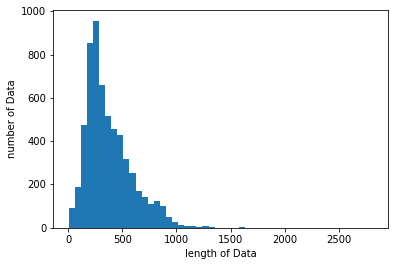

최대 길이 :  1480
평균 길이 :  458.32178598922246


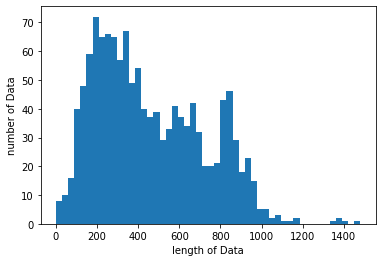

In [34]:
print("최대 길이 : ", max(len(l) for l in X_train))
print("평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()


print("최대 길이 : ", max(len(l) for l in X_test)) 
print("평균 길이 : ", sum(map(len, X_test))/ len(X_test)) 
plt.hist([len(s) for s in X_test], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()


In [35]:
import numpy as np 
y_train = [] 
y_test = [] 

for i in range(len(train_data['UpDown'])): 
    if train_data['UpDown'].iloc[i] == 1: 
        y_train.append([0, 0, 1]) 
    elif train_data['UpDown'].iloc[i] == 0:
        y_train.append([0, 1, 0]) 
    elif train_data['UpDown'].iloc[i] == -1: 
        y_train.append([1, 0, 0]) 

for i in range(len(test_data['UpDown'])): 
    if test_data['UpDown'].iloc[i] == 1: 
        y_test.append([0, 0, 1]) 
    elif test_data['UpDown'].iloc[i] == 0: 
        y_test.append([0, 1, 0]) 
    elif test_data['UpDown'].iloc[i] == -1: 
        y_test.append([1, 0, 0]) 

y_train = np.array(y_train) 
y_test = np.array(y_test)


In [36]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 

max_len = 100 # 전체 데이터의 길이를 20로 맞춘다 

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [37]:
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(3, activation='softmax')) 

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         3500000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 3,617,635
Trainable params: 3,617,635
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
537/537 [==============================] - 59s 107ms/step - loss: 0.7067 - accuracy: 0.5114 - val_loss: 0.6984 - val_accuracy: 0.5176
Epoch 2/10
537/537 [==============================] - 56s 105ms/step - loss: 0.6890 - accuracy: 0.5536 - val_loss: 0.7000 - val_accuracy: 0.4958
Epoch 3/10
537/537 [==============================] - 56s 105ms/step - loss: 0.6550 - accuracy: 0.6015 - val_loss: 0.7045 - val_accuracy: 0.4958
Epoch 4/10
537/537 [==============================] - 56s 105ms/step - loss: 0.6205 - accuracy: 0.6233 - val_loss: 0.6971 - val_accuracy: 0.4958
Epoch 5/10
537/537 [==============================] - 56s 105ms/step - loss: 0.5828 - accuracy: 0.6432 - val_loss: 0.7216 - val_accuracy: 0.4824
Epoch 6/10
537/537 [==============================] - 57s 106ms/step - loss: 0.5548 - accuracy: 0.6542 - val_loss: 0.7079 - val_accuracy: 0.5025
Epoch 7/10
 46/537 [=>............................] - ETA: 50s - loss: 0.5463 - accuracy: 0.6609

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

RuntimeError: Physical devices cannot be modified after being initialized